# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [21]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

617

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [22]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

cloudiness = []
country = []
date = []
humidity = []
lat = []
longitude = []
maxTemp = []
windSpeed = []
filteredCities = []

print("Beginning Data Retrieval")
print("---------------------------")
row = 1
sett = 1
for city in cities:
    print(f"Processing Record {row} of Set {sett} | {city}")
    response = requests.get(query_url + city).json()
    #print(response)
    if(response["cod"] == "404"):
        print(f"City Name : {city} Not Found Continue")
        continue
    cloudiness.append(response["clouds"]["all"])
    country.append(response["sys"]["country"])
    date.append(response["dt"])
    humidity.append(response["main"]["humidity"])
    lat.append(response["coord"]["lat"])
    longitude.append(response["coord"]["lon"])
    maxTemp.append(response["main"]["temp_max"])
    windSpeed.append(response["wind"]["speed"])
    filteredCities.append(city)
    row += 1
    if(row == 50):
        sett += 1
        row = 1

cities = filteredCities
print(len(cities))
print(len(cloudiness))
city_temp_df = pd.DataFrame({
    "City" : cities,
    "Cloudiness" : cloudiness,
    "Country" : country,
    "Date" : date,
    "Humidity" : humidity,
    "Lat" :lat,
    "Lng" : longitude,
    "Max Temp" : maxTemp,
    "Wind Speed" : windSpeed
})



Beginning Data Retrieval
---------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | kalmunai
Processing Record 3 of Set 1 | klaksvik
Processing Record 4 of Set 1 | arraial do cabo
Processing Record 5 of Set 1 | siderno
Processing Record 6 of Set 1 | port hardy
Processing Record 7 of Set 1 | torbay
Processing Record 8 of Set 1 | saskylakh
Processing Record 9 of Set 1 | kasongo-lunda
Processing Record 10 of Set 1 | lebu
Processing Record 11 of Set 1 | puerto ayora
Processing Record 12 of Set 1 | alta floresta
Processing Record 13 of Set 1 | moroni
Processing Record 14 of Set 1 | pacific grove
Processing Record 15 of Set 1 | sola
Processing Record 16 of Set 1 | hobart
Processing Record 17 of Set 1 | yellowknife
Processing Record 18 of Set 1 | haverhill
Processing Record 19 of Set 1 | jamestown
Processing Record 20 of Set 1 | cape town
Processing Record 21 of Set 1 | calabozo
Processing Record 22 of Set 1 | kapaa
Processing Record 23 of Set 1 | wahpet

Processing Record 14 of Set 4 | walvis bay
Processing Record 15 of Set 4 | mahebourg
Processing Record 16 of Set 4 | dongsheng
Processing Record 17 of Set 4 | tumannyy
City Name : tumannyy Not Found Continue
Processing Record 17 of Set 4 | saldanha
Processing Record 18 of Set 4 | morbegno
Processing Record 19 of Set 4 | soanierana ivongo
Processing Record 20 of Set 4 | monrovia
Processing Record 21 of Set 4 | kriel
Processing Record 22 of Set 4 | svetlaya
Processing Record 23 of Set 4 | amderma
City Name : amderma Not Found Continue
Processing Record 23 of Set 4 | pictou
Processing Record 24 of Set 4 | thompson
Processing Record 25 of Set 4 | salinas
Processing Record 26 of Set 4 | kavieng
Processing Record 27 of Set 4 | mocambique
City Name : mocambique Not Found Continue
Processing Record 27 of Set 4 | maridi
City Name : maridi Not Found Continue
Processing Record 27 of Set 4 | great bend
Processing Record 28 of Set 4 | qui nhon
City Name : qui nhon Not Found Continue
Processing Reco

City Name : saleaula Not Found Continue
Processing Record 34 of Set 7 | hunza
City Name : hunza Not Found Continue
Processing Record 34 of Set 7 | alta
Processing Record 35 of Set 7 | ambulu
Processing Record 36 of Set 7 | hofn
Processing Record 37 of Set 7 | kamloops
Processing Record 38 of Set 7 | labutta
City Name : labutta Not Found Continue
Processing Record 38 of Set 7 | saint-augustin
Processing Record 39 of Set 7 | falealupo
City Name : falealupo Not Found Continue
Processing Record 39 of Set 7 | isangel
Processing Record 40 of Set 7 | kaohsiung
Processing Record 41 of Set 7 | baoding
Processing Record 42 of Set 7 | lewiston
Processing Record 43 of Set 7 | karpathos
Processing Record 44 of Set 7 | mitsamiouli
Processing Record 45 of Set 7 | mehamn
Processing Record 46 of Set 7 | ola
Processing Record 47 of Set 7 | guabito
Processing Record 48 of Set 7 | gazojak
Processing Record 49 of Set 7 | lata
Processing Record 1 of Set 8 | vanavara
Processing Record 2 of Set 8 | batie
Proc

Processing Record 35 of Set 10 | kruisfontein
Processing Record 36 of Set 10 | sansai
City Name : sansai Not Found Continue
Processing Record 36 of Set 10 | aktau
Processing Record 37 of Set 10 | krasnaya gora
Processing Record 38 of Set 10 | mamallapuram
Processing Record 39 of Set 10 | honiara
Processing Record 40 of Set 10 | stornoway
City Name : stornoway Not Found Continue
Processing Record 40 of Set 10 | bercel
Processing Record 41 of Set 10 | sokolo
Processing Record 42 of Set 10 | ankang
Processing Record 43 of Set 10 | dingle
Processing Record 44 of Set 10 | yumen
Processing Record 45 of Set 10 | luderitz
Processing Record 46 of Set 10 | okha
Processing Record 47 of Set 10 | muncar
Processing Record 48 of Set 10 | camana
City Name : camana Not Found Continue
Processing Record 48 of Set 10 | cambridge
Processing Record 49 of Set 10 | bethanien
Processing Record 1 of Set 11 | polyarnyy
Processing Record 2 of Set 11 | arrifes
Processing Record 3 of Set 11 | beringovskiy
Processin

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [23]:
city_temp_df.dtypes


City           object
Cloudiness      int64
Country        object
Date            int64
Humidity        int64
Lat           float64
Lng           float64
Max Temp      float64
Wind Speed    float64
dtype: object

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

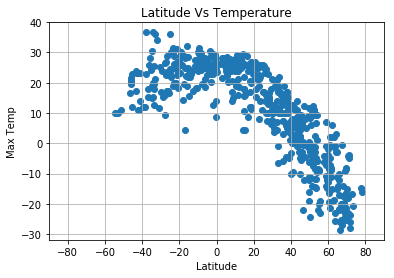

In [29]:
# Plot
plt.scatter(lat, maxTemp, marker = 'o')
plt.title('Latitude Vs Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.xlim(-90,90)
plt.grid(True)
plt.show()

In [2]:
print("Latitude Vs Temperature, Temperature is warmer when Latitude moves to negative to -40 i.e at Southern Hemisphere ")

Latitude Vs Temperature, Temperature is warmer when Latitude moves to negative to -40 i.e at Southern Hemisphere 


#### Latitude vs. Humidity Plot

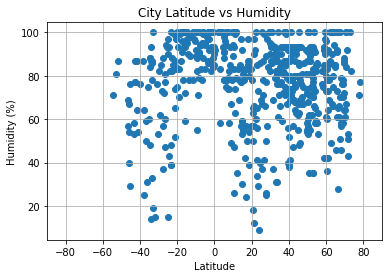

In [25]:
# Latitude vs Cloudiness
plt.scatter(lat, humidity, marker="o")

# Add chart labels
plt.title("City Latitude vs Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-90,90)

# Save the figure
plt.savefig("Lat_vs_Humidity.png")

# Show plot
plt.show()

In [4]:
print("Latitude Vs Humidity, There is no strong correlation between Latitude vs Humidity However, it is interesting to see that a strong band of cities sits at -20,0,40, 60 with 100% humidity.")

Latitude Vs Humidity, There is no strong correlation between Latitude vs Humidity However, it is interesting to see that a strong band of cities sits at -20,0,40, 60 with 100% humidity.


#### Latitude vs. Cloudiness Plot

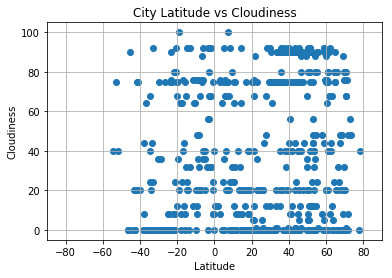

In [26]:
# Latitude vs Cloudiness
plt.scatter(lat, cloudiness, marker="o")

# Add chart labels
plt.title("City Latitude vs Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-90,90)

# Save the figure
plt.savefig("Lat_vs_Cloudiness.png")

# Show plot
plt.show()

In [ ]:
print("Latitude Vs Cloudiness, There is no strong correlation between Latitude vs Cloudiness However, it is interesting to see some band of cities sits at 10, -20, and 100% cloudiness.")

#### Latitude vs. Wind Speed Plot

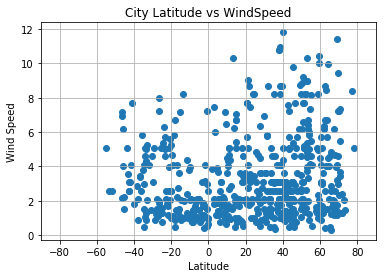

In [27]:
# Latitude vs Cloudiness
plt.scatter(lat, windSpeed, marker="o")

# Add chart labels
plt.title("City Latitude vs WindSpeed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-90,90)

# Save the figure
plt.savefig("Lat_vs_Windspeed.png")

# Show plot
plt.show()

In [ ]:
print("Latitude Vs Windspeed, There is no strong correlation between Latitude vs wind speed, However there are most number of cities with > 10 mp ")